In [1]:
from torchvision.datasets import Caltech101

c:\ProgramData\Anaconda3\envs\pytorch-2.2.1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = Caltech101(root="./data")
print(len(dataset))

len(dataset) / 500

8677


17.354

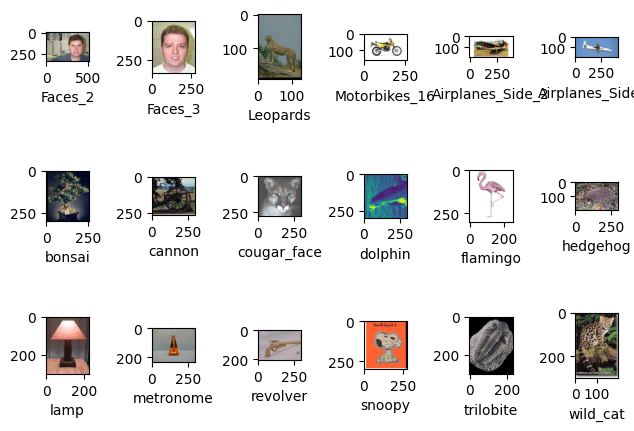

In [3]:
from matplotlib import pyplot as plt
for i, d in enumerate(dataset):
    if i % 500 == 0:
        plt.subplot(3, 6, int(i / 500) + 1)
        image, label = d
        plt.imshow(image)
        plt.xlabel(dataset.annotation_categories[label])
    
plt.tight_layout()

In [7]:
print(dataset.annotation_categories[0])
print(dataset.annotation_categories[1])
len(dataset.annotation_categories)

Faces_2
Faces_3


101

In [5]:
for i, name in enumerate(dataset.annotation_categories):
    if name == "octopus":
        print(i)
    if name == "cannon":
        print(i)
    if name == "water_lilly":
        print(i)

18
67
95


In [4]:
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt

def cal_distributiton(dataset, name="All"):
    class_counts = np.zeros(101, dtype=np.int32)
    for image, label in dataset:
        class_counts[label] += 1
    print(class_counts.max())
    print(class_counts.min())
    plt.figure(figsize=(15,5))
    plt.bar(np.arange(101), class_counts)
    plt.title(f"{name} Data Distribution Among Classes")
    plt.savefig(f"./figs/{name}-class-distribution.svg")


800
31


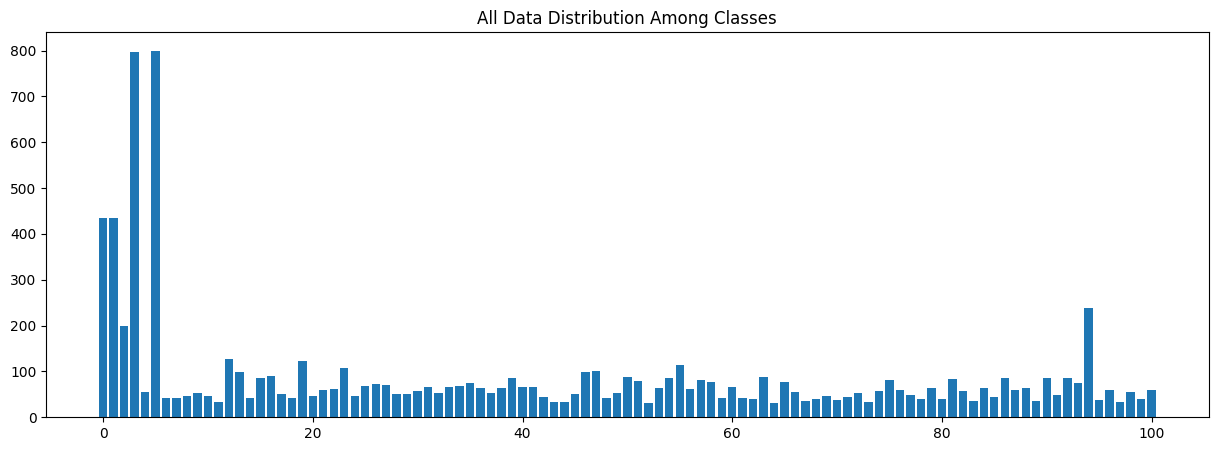

In [5]:
cal_distributiton(dataset)

In [38]:
from split_dataset import load_indices
from torch.utils.data import Subset, DataLoader, Dataset
from torchvision.datasets import Caltech101
from torchvision import transforms


dataset = Caltech101(root="./data")

transform = transforms.Compose([
    transforms.Resize(256),
    # transforms.RandomResizedCrop(224),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class TransformApplier:
    def __init__(self, subset, transform):
        self.subset = subset
        self.transform = transform

    def __len__(self):
        return len(self.subset)

    def __getitem__(self, idx):
        data, target = self.subset[idx]
        return self.transform(data), target

train_indices = load_indices("./data/caltech101/train_indices.txt")
val_indices = load_indices("./data/caltech101/val_indices.txt")

train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)

train_dataset = TransformApplier(train_dataset, transform)
val_dataset = TransformApplier(val_dataset, transform)

790
26


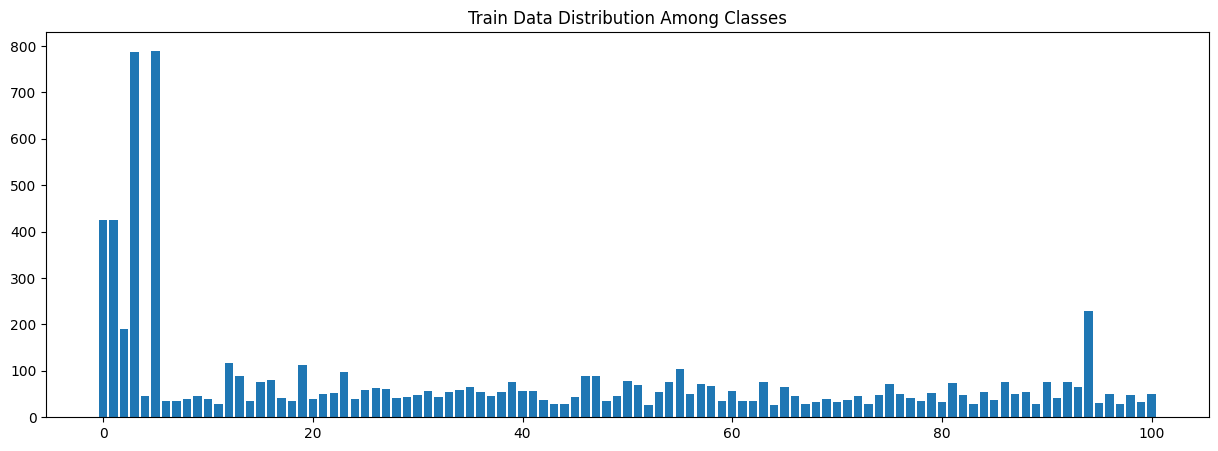

In [29]:
cal_distributiton(train_dataset, "Train")

10
5


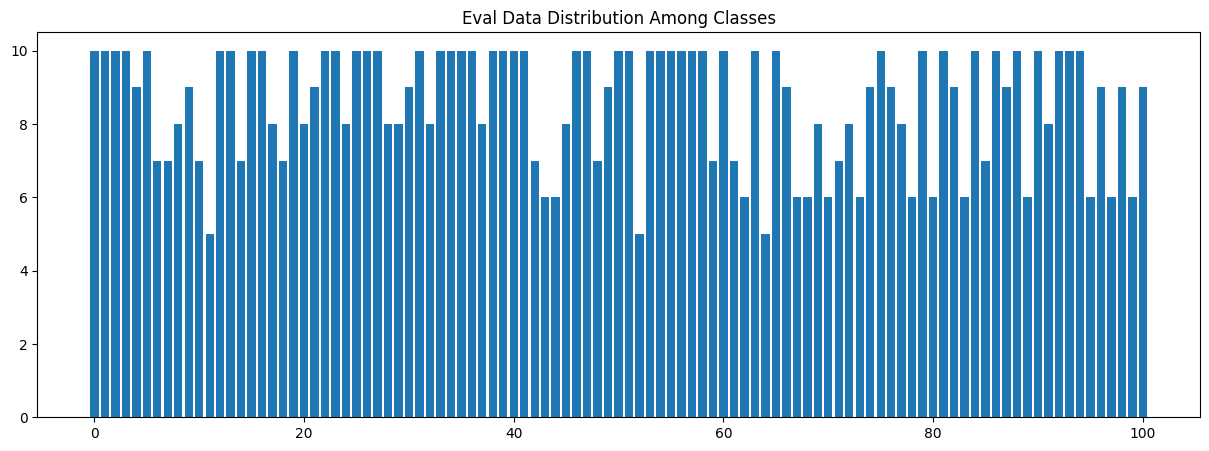

In [24]:
cal_distributiton(val_dataset, "Eval")

In [46]:
# get mean and std
import torch
from tqdm import tqdm
mean = torch.zeros(3)
std = torch.zeros(3)
count = 0
for image, _ in tqdm(train_dataset):
    count += image.shape[-1] * image.shape[-2]
    mean += torch.sum(image, dim=[1, 2])
    std += torch.sum(image**2, dim=[1, 2])

train_mean = mean / count
train_std = (std / count - train_mean**2).sqrt()

mean = torch.zeros(3)
std = torch.zeros(3)
count = 0
for image, _ in tqdm(val_dataset):
    count += image.shape[-1] * image.shape[-2]
    mean += torch.sum(image, dim=[1, 2])
    std += torch.sum(image**2, dim=[1, 2])

val_mean = mean / count
val_std = (std / count - val_mean**2).sqrt()

print("trian\t", train_mean, train_std)
print("val:\t", val_mean, val_std)

100%|██████████| 867/867 [00:01<00:00, 508.05it/s]

trian	 tensor([0.5418, 0.5323, 0.5092]) tensor([0.3099, 0.3025, 0.3171])
val:	 tensor([0.5459, 0.5170, 0.4862]) tensor([0.3175, 0.3155, 0.3270])
